In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import matplotlib as mpl
import yfinance as yf
import mplfinance as mpf
import pandas_ta as pta
import yfinance as yf

C:\Users\bert0\AppData\Local\Temp\ipykernel_22212\825757011.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from datetime import date
from datetime import timedelta

#Testing the data since 2024/01/01
delta = timedelta(77)
today = date.today()
previous_date=today-delta
previous_date


datetime.date(2024, 1, 1)

In [3]:
def getstock(stock,startday=str(previous_date),endday= str(today)):
    df = yf.download(stock,start = startday ,end=endday)
    df_adj = df.reindex(columns=[ 'Open', 'High', 'Low','Close'])#.rename(columns={"Adj Close":"Close"})
    return df_adj

In [4]:
data = getstock('NVDA')

[*********************100%***********************]  1 of 1 completed


c:\Users\bert0\OneDrive\文件\quantcc\env_ds_39\lib\site-packages\yfinance\base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
c:\Users\bert0\OneDrive\文件\quantcc\env_ds_39\lib\site-packages\yfinance\base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

# # Data viewing

In [5]:
data = data.iloc[-300:,:4]

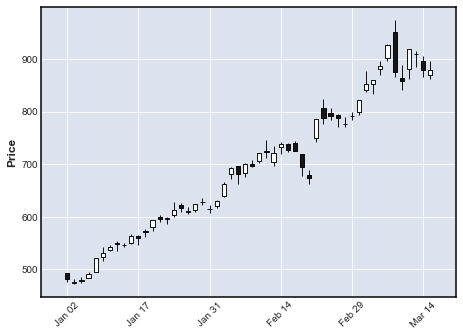

In [6]:
mpf.plot(data,type='candle')

In [7]:
def generategridlinelist(buylowest,sellhighest,linenum):
    grid_diff = round((sellhighest - buylowest)/(linenum-1),8)
    #grid_diff = round((sellhighest - buylowest)/linenum,8)
    resultlist = []
    priceline = buylowest
    for i in range(linenum):
        resultlist.append(priceline)
        priceline += grid_diff
    return resultlist

In [8]:
def getportionindex(price,gl):
    count = 0
    for i in gl:
        if price != i and price > i :
            count +=1
    if price > gl[-1]:
        count -= 1
    return count

In [9]:
gridline = []
def findgridline(close_previous,close_new,gl = gridline):
    result = 0
    for l in gridline:
        if close_previous < l:
            if close_new < l:
                break
            elif close_new >= l:
                result = l
        elif close_previous == l:
            result = l
        elif close_previous > l:
            if close_new > l:
                continue
            elif close_new <= l:
                result = l
    return result

In [10]:
def findstartposition(startprice, gl=gridline):
    result = 0 
    for price in gridline:
        if startprice > price:
            continue
        else:
            result = price
            break
    return result

In [11]:
def spend_on_stock(price,money,gridline_list):
    # mean find price in the index of gridline ex 190 is index 0
    index = getportionindex(price,gridline_list)
    #if it is index 0, that mean spend all money, 
    #so using gridline number -1 (because there is one gridline is $0 ) minus index
    return money/(len(gridline_list)-1)*(len(gridline_list)-1-index)
    

In [12]:
def totalasset(Close,stockshare,remain_cash):
    return round(stockshare*Close + remain_cash,2)

# Grid Strategy Control Table

In [13]:
sellhighest = 750.0#890.0  
buylowest = 420.0
gridlinenum = 11
original_money = 10000
initialprice = 480 #close price on 01/02/2024

In [14]:
gridline = generategridlinelist(buylowest,sellhighest,gridlinenum)

In [15]:
gridline 

[420.0, 453.0, 486.0, 519.0, 552.0, 585.0, 618.0, 651.0, 684.0, 717.0, 750.0]

In [16]:
getportionindex(400,gridline)

0

In [17]:
spend_on_stock(190,original_money,gridline)

10000.0

In [18]:
dftest = pd.DataFrame(data).reindex(columns=['Close'])#columns=[ 'Open', 'Close']
dftest

,Close
Date,
2024-01-02,481.679993
2024-01-03,475.690002
2024-01-04,479.980011
2024-01-05,490.970001
2024-01-08,522.530029
2024-01-09,531.400024
2024-01-10,543.500000
2024-01-11,548.219971
2024-01-12,547.099976


In [19]:
# see how the price pass each gridline
stockprice = []

'''
if dftest.Close[0] in gridline:
    stockprice.append(dftest.Close[0])
else:
    stockprice.append(0)
'''
startingprice = findstartposition(dftest.Close[0])
stockprice.append(startingprice)
    
for i in range(1,len(dftest)):
    stockprice.append(findgridline(dftest.Close[i-1],dftest.Close[i]))
dftest['Stock_Price'] = stockprice
dftest

C:\Users\bert0\AppData\Local\Temp\ipykernel_22212\4067861968.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  startingprice = findstartposition(dftest.Close[0])
C:\Users\bert0\AppData\Local\Temp\ipykernel_22212\4067861968.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stockprice.append(findgridline(dftest.Close[i-1],dftest.Close[i]))


,Close,Stock_Price
Date,,
2024-01-02,481.679993,486.0
2024-01-03,475.690002,0.0
2024-01-04,479.980011,0.0
2024-01-05,490.970001,486.0
2024-01-08,522.530029,519.0
2024-01-09,531.400024,0.0
2024-01-10,543.500000,0.0
2024-01-11,548.219971,0.0
2024-01-12,547.099976,0.0


In [20]:
dftest[dftest.Stock_Price != 0]

,Close,Stock_Price
Date,,
2024-01-02,481.679993,486.0
2024-01-05,490.970001,486.0
2024-01-08,522.530029,519.0
2024-01-16,563.820007,552.0
2024-01-19,594.909973,585.0
2024-01-29,624.650024,618.0
2024-01-31,615.270020,618.0
2024-02-01,630.270020,618.0
2024-02-02,661.599976,651.0


In [21]:
spend_on_stock_list =[]
stockflow=[]
stocknum = []
moneylist = []

last_cash_flow_in_stock = 0.0
flowingstock = 0
total_stock = 0
money_onhand = original_money 

for i in dftest.Stock_Price:
    if i == 0:
        
        spend_on_stock_list.append(0.0)
        stockflow.append(flowingstock)
        stocknum.append(total_stock)
        moneylist.append(money_onhand)
        
    else:
        
        #target money spend
        spendon = spend_on_stock(i,original_money,gridline)
        

        if spendon != 0:
            
            #temp means change in spending on stock cash amount
            temp = spendon - last_cash_flow_in_stock
            spend_on_stock_list.append(temp)
            last_cash_flow_in_stock = spendon
            
            flowingstock = (temp)//i
            stockflow.append(flowingstock)
            
            total_stock+=flowingstock
            stocknum.append(total_stock)
            
            money_onhand -= flowingstock*i
            moneylist.append(money_onhand)
            
            flowingstock = 0
            
        else:
            spend_on_stock_list.append(0.0)
            stockflow.append(flowingstock)
            stocknum.append(total_stock)
            moneylist.append(money_onhand)

dftest['Cash_spend_on_stock'] = spend_on_stock_list
dftest["Flowing_Stock"] = stockflow
dftest["Stock_On_Hand"] = stocknum
dftest["Money_Onhand"] = moneylist

In [22]:
dftest[dftest.Flowing_Stock != 0]
#dftest[:50]

,Close,Stock_Price,Cash_spend_on_stock,Flowing_Stock,Stock_On_Hand,Money_Onhand
Date,,,,,,
2024-01-02,481.679993,486.0,8000.0,16.0,16.0,2224.0
2024-01-08,522.530029,519.0,-1000.0,-2.0,14.0,3262.0
2024-01-16,563.820007,552.0,-1000.0,-2.0,12.0,4366.0
2024-01-19,594.909973,585.0,-1000.0,-2.0,10.0,5536.0
2024-01-29,624.650024,618.0,-1000.0,-2.0,8.0,6772.0
2024-02-02,661.599976,651.0,-1000.0,-2.0,6.0,8074.0
2024-02-05,693.320007,684.0,-1000.0,-2.0,4.0,9442.0
2024-02-09,721.330017,717.0,-1000.0,-2.0,2.0,10876.0
2024-02-21,674.719971,684.0,1000.0,1.0,3.0,10192.0


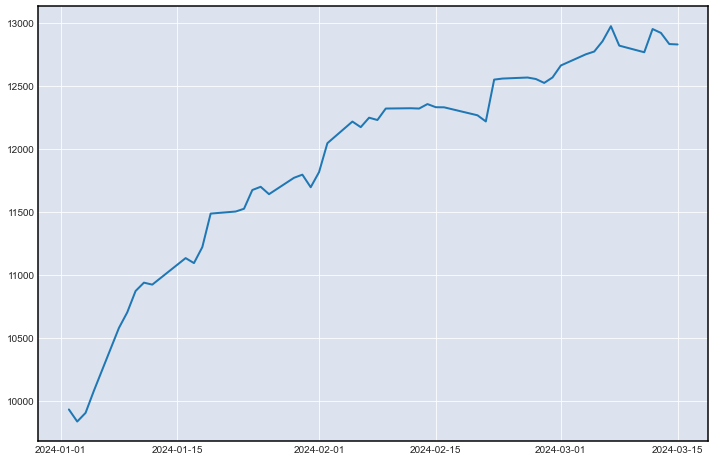

In [23]:
#dftest
plt.figure(figsize=(12,8))
plt.plot(totalasset(dftest.Close,dftest.Stock_On_Hand,dftest.Money_Onhand))

In [24]:
dftest['Asset'] = totalasset(dftest.Close,dftest.Stock_On_Hand,dftest.Money_Onhand)

In [25]:
dftest

,Close,Stock_Price,Cash_spend_on_stock,Flowing_Stock,Stock_On_Hand,Money_Onhand,Asset
Date,,,,,,,
2024-01-02,481.679993,486.0,8000.0,16.0,16.0,2224.0,9930.88
2024-01-03,475.690002,0.0,0.0,0.0,16.0,2224.0,9835.04
2024-01-04,479.980011,0.0,0.0,0.0,16.0,2224.0,9903.68
2024-01-05,490.970001,486.0,0.0,0.0,16.0,2224.0,10079.52
2024-01-08,522.530029,519.0,-1000.0,-2.0,14.0,3262.0,10577.42
2024-01-09,531.400024,0.0,0.0,0.0,14.0,3262.0,10701.60
2024-01-10,543.500000,0.0,0.0,0.0,14.0,3262.0,10871.00
2024-01-11,548.219971,0.0,0.0,0.0,14.0,3262.0,10937.08
2024-01-12,547.099976,0.0,0.0,0.0,14.0,3262.0,10921.40
